In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('./data/World University Rankings 2023.csv')
df.head()



,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",0.044003,42%,48 : 52,96.4,0.969952,1.000000,0.989919,0.602219,0.959112
1,2,Harvard University,United States,"21,887",0.039689,25%,50 : 50,95.2,1.000000,0.992416,0.992944,0.199683,0.775701
2,3,University of Cambridge,United Kingdom,"20,185",0.047023,39%,47 : 53,94.8,0.953125,0.997833,0.969758,0.274168,0.954439
3,3,Stanford University,United States,"16,164",0.028904,24%,46 : 54,94.8,0.992788,0.967497,0.997984,0.445325,0.767523
4,5,Massachusetts Institute of Technology,United States,"11,415",0.033650,33%,40 : 60,94.2,0.950721,0.933911,0.997984,0.855784,0.878505


In [16]:
# Print column names to diagnose KeyError
print("Column names:", df.columns.tolist())

# Step 1: Exploratory Data Analysis (EDA)
# --------------------------------------
# Check for missing values


Column names: ['University Rank', 'Name of University', 'Location', 'No of student', 'No of student per staff', 'International Student', 'Female:Male Ratio', 'OverAll Score', 'Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score']


In [17]:
print("Missing values per column:")
print(df.isnull().sum())




Missing values per column:
University Rank                0
Name of University             0
Location                       0
No of student                  0
No of student per staff        0
International Student          0
Female:Male Ratio              0
OverAll Score                  0
Teaching Score                 0
Research Score                 0
Citations Score                0
Industry Income Score          0
International Outlook Score    0
dtype: int64


In [18]:
# Data types and basic statistics
print("Data types:")
print(df.dtypes)


Data types:
University Rank                 object
Name of University              object
Location                        object
No of student                   object
No of student per staff        float64
International Student           object
Female:Male Ratio               object
OverAll Score                   object
Teaching Score                 float64
Research Score                 float64
Citations Score                float64
Industry Income Score          float64
International Outlook Score    float64
dtype: object


In [19]:
print("Basic statistics:")
print(df.describe(include='all'))


Basic statistics:
       University Rank       Name of University       Location No of student  \
count             2312                     2312           2312          2312   
unique             162                     2233            116          2136   
top           Reporter  AECC University College  United States         1,015   
freq               512                       80            438           105   
mean               NaN                      NaN            NaN           NaN   
std                NaN                      NaN            NaN           NaN   
min                NaN                      NaN            NaN           NaN   
25%                NaN                      NaN            NaN           NaN   
50%                NaN                      NaN            NaN           NaN   
75%                NaN                      NaN            NaN           NaN   
max                NaN                      NaN            NaN           NaN   

        No of student

In [21]:

# Step 2: Data Cleaning
# ---------------------
# Drop duplicates
df = df.drop_duplicates()
df.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",0.044003,42%,48 : 52,96.4,0.969952,1.000000,0.989919,0.602219,0.959112
1,2,Harvard University,United States,"21,887",0.039689,25%,50 : 50,95.2,1.000000,0.992416,0.992944,0.199683,0.775701
2,3,University of Cambridge,United Kingdom,"20,185",0.047023,39%,47 : 53,94.8,0.953125,0.997833,0.969758,0.274168,0.954439
3,3,Stanford University,United States,"16,164",0.028904,24%,46 : 54,94.8,0.992788,0.967497,0.997984,0.445325,0.767523
4,5,Massachusetts Institute of Technology,United States,"11,415",0.033650,33%,40 : 60,94.2,0.950721,0.933911,0.997984,0.855784,0.878505


In [22]:

# Handling missing values
# Example: Fill missing values with the median for numerical columns
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].median(), inplace=True)


C:\Users\juanf\AppData\Local\Temp\ipykernel_14812\1886482313.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\juanf\AppData\Local\Temp\ipykernel_14812\1886482313.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [23]:

# Fill missing values with mode for categorical columns
for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


C:\Users\juanf\AppData\Local\Temp\ipykernel_14812\1208689421.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [24]:

# Correct data types if necessary
# Identify the correct column name if 'rank' doesn't exist
if 'rank' in df.columns:
    if df['rank'].dtype != 'int64':
        df['rank'] = df['rank'].astype('int64')
else:
    print("Column 'rank' not found. Available columns:", df.columns.tolist())


Column 'rank' not found. Available columns: ['University Rank', 'Name of University', 'Location', 'No of student', 'No of student per staff', 'International Student', 'Female:Male Ratio', 'OverAll Score', 'Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score']


In [25]:

# Step 3: Feature Engineering
# ---------------------------
# Example: Create a new feature 'is_top_100' indicating if the university is in the top 100
if 'rank' in df.columns:
    df['is_top_100'] = df['rank'] <= 100


  University Rank                     Name of University        Location  \
0               1                   University of Oxford  United Kingdom   
1               2                     Harvard University   United States   
2               3                University of Cambridge  United Kingdom   
3               3                    Stanford University   United States   
4               5  Massachusetts Institute of Technology   United States   

  No of student  No of student per staff International Student  \
0        20,965                 0.044003                   42%   
1        21,887                 0.039689                   25%   
2        20,185                 0.047023                   39%   
3        16,164                 0.028904                   24%   
4        11,415                 0.033650                   33%   

  Female:Male Ratio OverAll Score  Teaching Score  Research Score  \
0           48 : 52          96.4        0.969952        1.000000   
1       

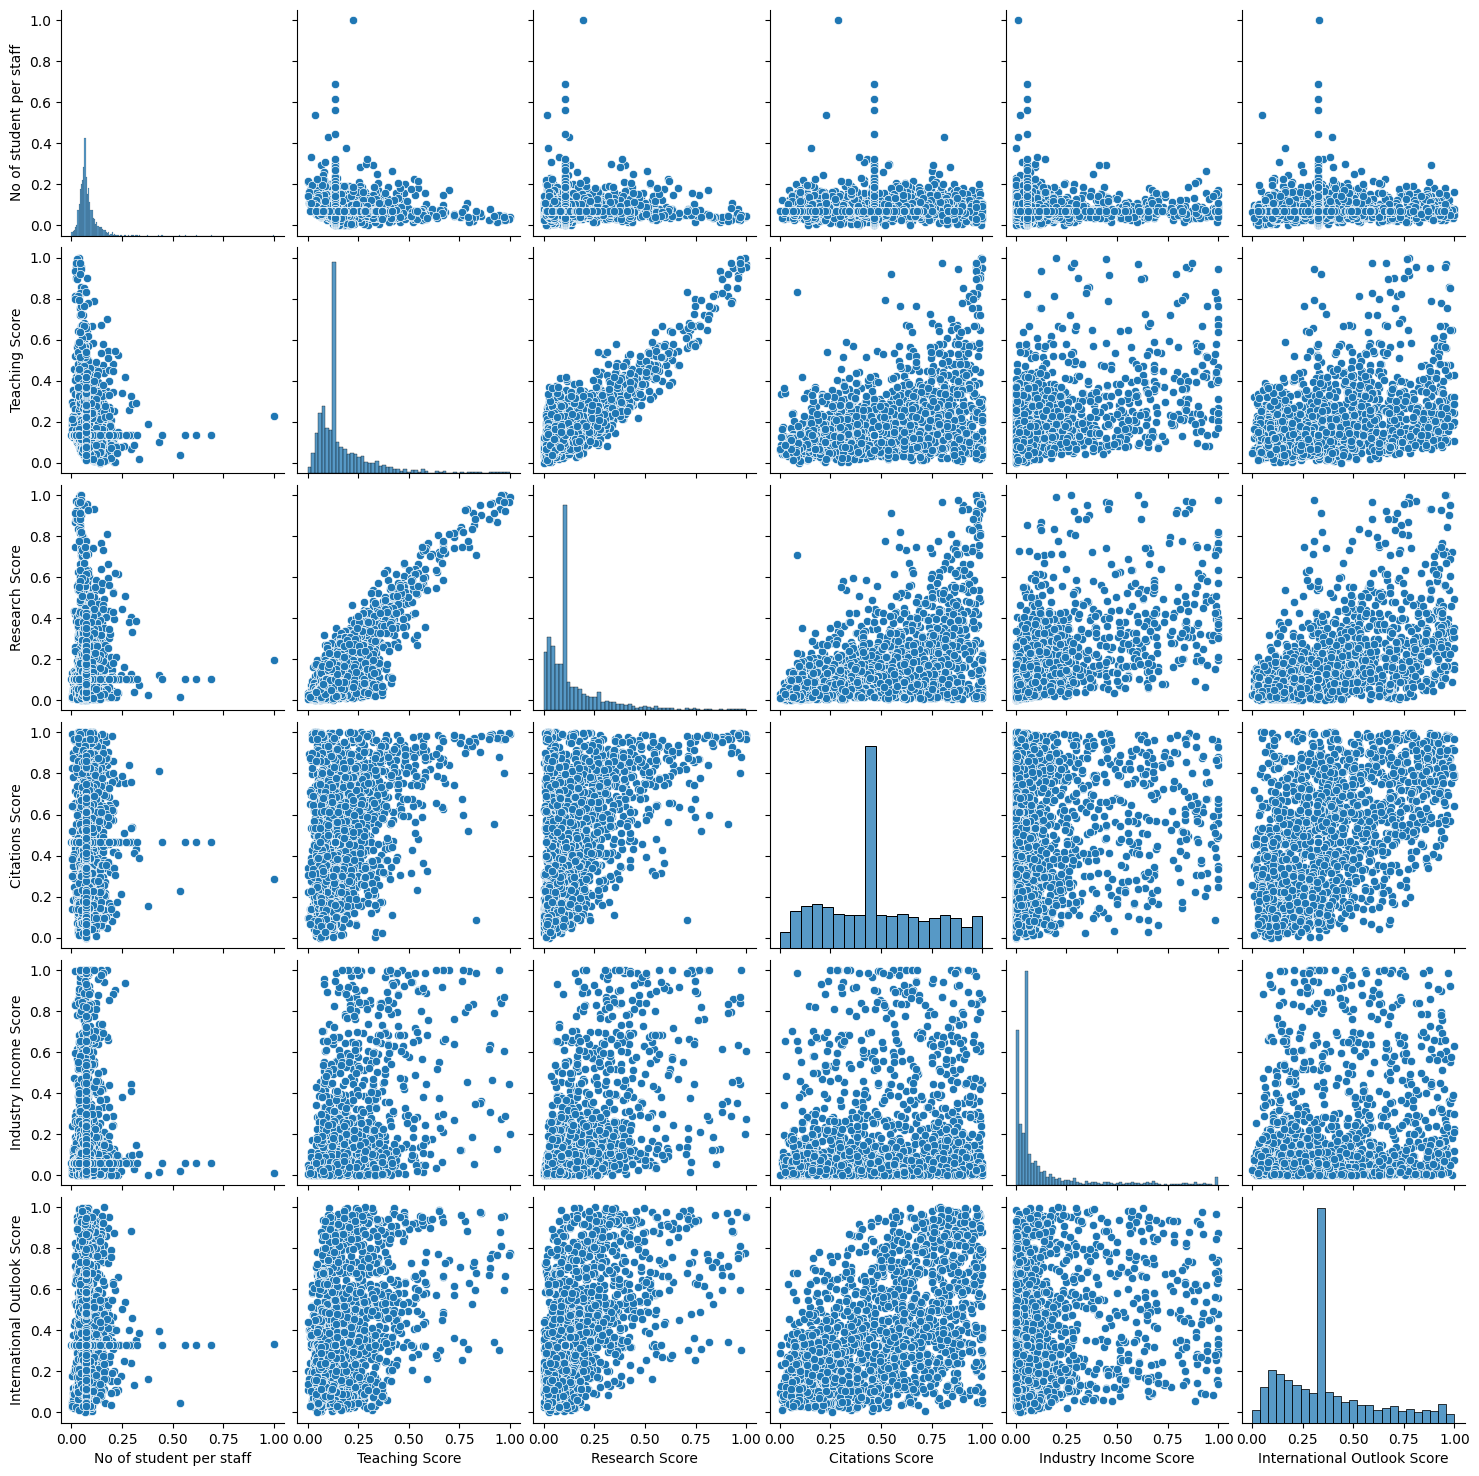

In [27]:

# Step 4: Normalization
# ---------------------
# Example: Normalize numerical features
scaler = MinMaxScaler()
numerical_features = df.select_dtypes(include=np.number).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Alternatively, you can use StandardScaler for standardization
# standard_scaler = StandardScaler()
# df[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

# Display the cleaned and processed data
print(df.head())

# Save the cleaned dataset to a new CSV file
df.to_csv('./data/World University Rankings 2023.csv', index=False)

# Visualize some features if needed
sns.pairplot(df, vars=numerical_features)
plt.show()